In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [63]:
df = pd.read_csv("Social_Network_Ads.csv")
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [64]:
df= df.iloc[:,2:]


In [65]:
df.sample(5)

,Age,EstimatedSalary,Purchased
355,60,34000,1
208,40,142000,1
389,48,35000,1
278,52,38000,1
147,41,30000,0


# Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
x_train.shape , x_test.shape

((280, 2), (120, 2))

# StandardScalar

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
#transform both the train and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [68]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [69]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [70]:
x_train_scaled


array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [71]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [72]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [73]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effects of scaling

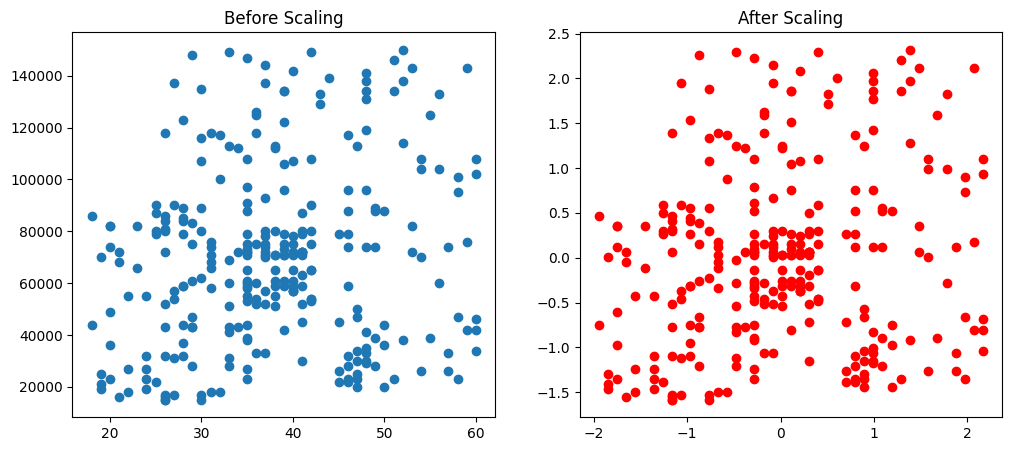

In [74]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize = (12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

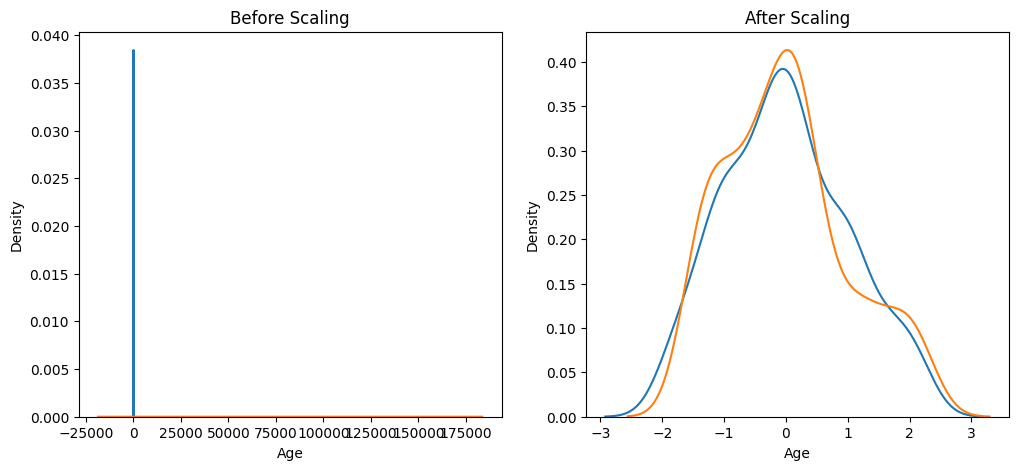

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

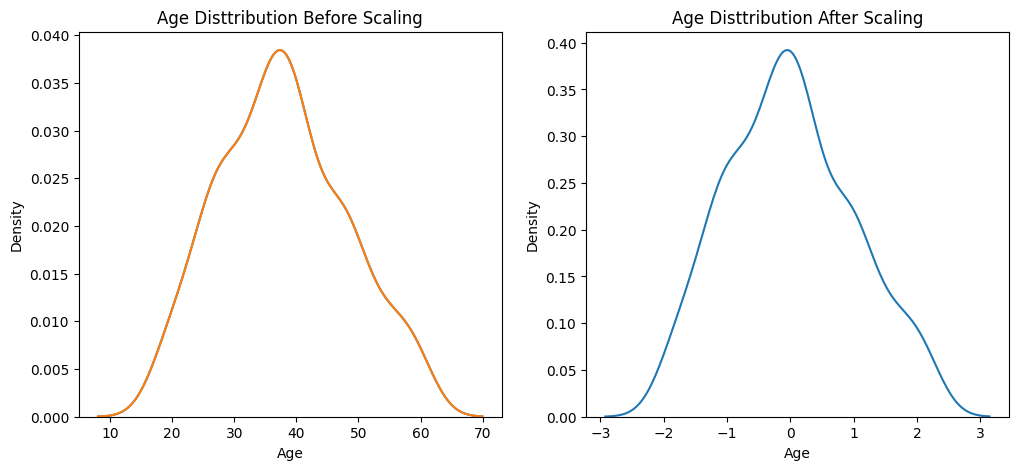

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x_train['Age'], ax=ax1)
# Before Scaling
ax1.set_title('Age Disttribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
# After Scaling
ax2.set_title('Age Disttribution After Scaling')    
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

# ON Salary

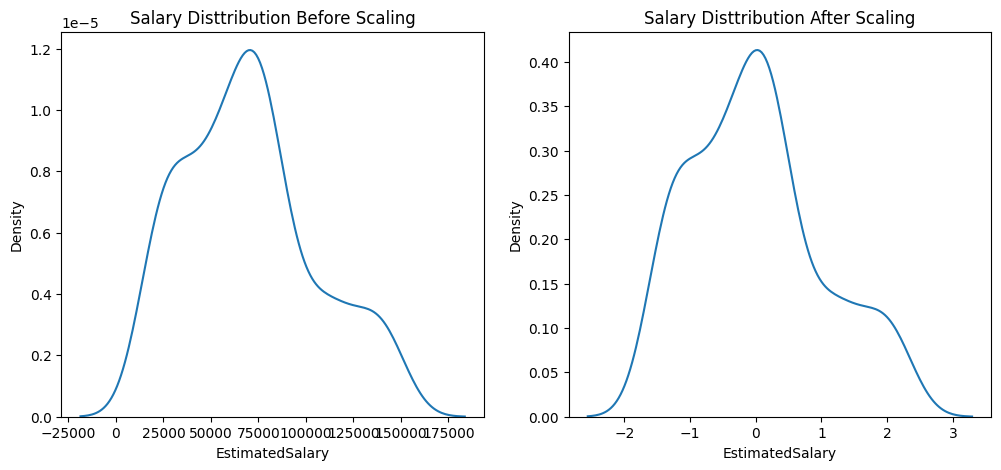

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Salary Disttribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
# After Scaling
ax2.set_title('Salary Disttribution After Scaling')    
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:

lr= LogisticRegression()
lr_scaled= LogisticRegression()


In [80]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [82]:
from sklearn.metrics import accuracy_score


In [83]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt= DecisionTreeClassifier()
dt_scaled= DecisionTreeClassifier()

In [86]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [88]:
print("Accuracy before scaling: ", accuracy_score(y_test, y_pred))
print("Accuracy after scaling: ", accuracy_score(y_test, y_pred_scaled))

Accuracy before scaling:  0.875
Accuracy after scaling:  0.8666666666666667


In [89]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effects of Outlier

In [96]:


new_rows = pd.DataFrame({
    "Age":[5,90,95],
    "EstimatedSalary":[1000, 250000, 350000],
    "Purchased":[0,1,1]})
df = pd.concat([df, new_rows], ignore_index=True)



In [97]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,2500000,1
402,95,3500000,1
403,5,1000,0
404,90,250000,1


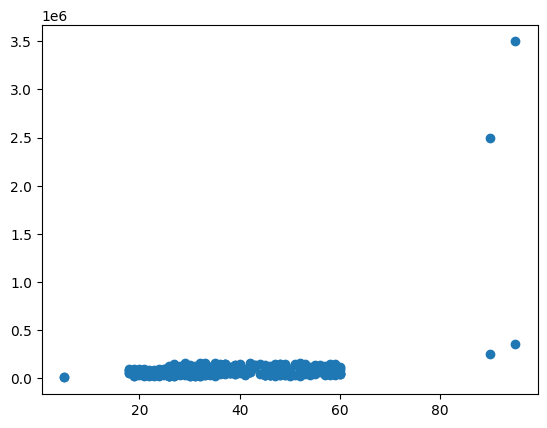

In [98]:
plt.scatter(df["Age"], df["EstimatedSalary"])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

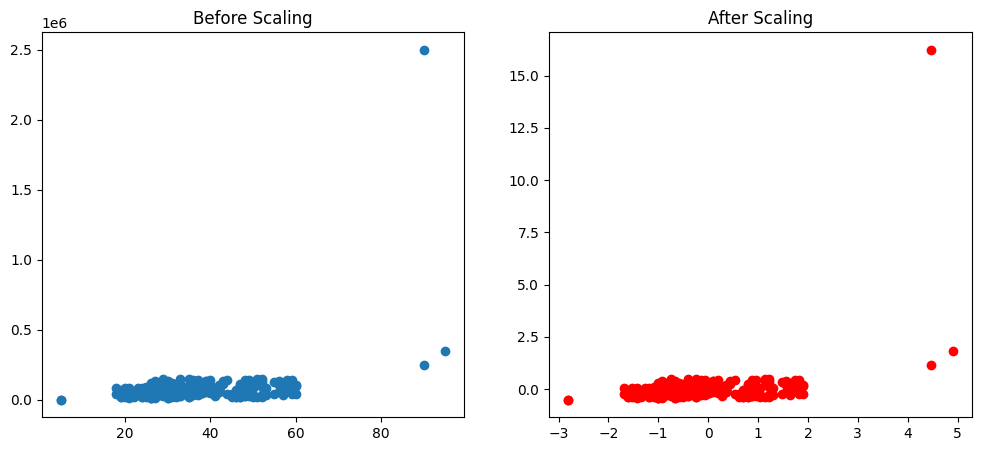

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# Use Standarization on these algorithm

1. K-means
2. K-Nearest-Neighbours(KNN)
3. Principal Component Analysis(PCA)
4. Artificial Neural Network
5. Gradient Descent